<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_KMeans_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means algorithm

##K-means example

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [129]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

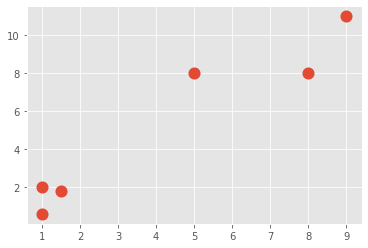

In [130]:
plt.scatter(X[:,0], X[:,1], s = 50, linewidths = 5) #All rows from first col, all rows from 2nd col
plt.show()

In [131]:
clf = KMeans(n_clusters = 2)
clf.fit(X)

KMeans(n_clusters=2)

In [132]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [133]:
colors = ['g.', 'r.', 'c.', 'b.', 'k.', 'o.']

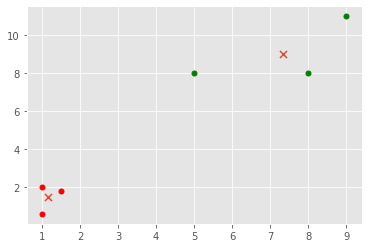

In [134]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 50, linewidths = 5)
plt.show()

##Titanic dataset

In [135]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



* pclass - passenger class (1, 2, 3)
* survival - survival (0 = no, 1 = yes)
*   sibsp - number of siblings/spouses aboard
*   parch - number of parents/children aborad
* ticket - ticket number
* fare - passenger fare (british pounds)
* cabin
* embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat - lifeboat
* body - body identification number
* home.dest - home/destination


In [136]:
df = pd.read_excel('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###Data preprocessing

In [137]:
df.drop(['body', 'name'], axis = 1, inplace = True)

In [138]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


###Handling categorical data - converting to numbers

In [139]:
df.apply(pd.to_numeric, errors='ignore')
df.fillna(0, inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


####LabelEncoder

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   object 
 9   embarked   1309 non-null   object 
 10  boat       1309 non-null   object 
 11  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [143]:
import pickle

columns = df.columns.values

for column in columns:
  if df[column].dtype != np.int64 and df[column].dtype != np.float64:
    le = LabelEncoder()
    df[column] = df[column].astype('string')
    df[column] = le.fit_transform(df[column])

    filehandler = open(f'/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/{df[column].name}.obj','wb')
    pickle.dump(le, filehandler)
    filehandler.close()

    df[column] = le.fit_transform(df[column])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   int64  
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   int64  
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   int64  
 9   embarked   1309 non-null   int64  
 10  boat       1309 non-null   int64  
 11  home.dest  1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


In [146]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,187,211.3375,44,3,12,309
1,1,1,1,0.9167,1,2,49,151.5500,80,3,3,231
2,1,0,0,2.0000,1,2,49,151.5500,80,3,0,231
3,1,0,1,30.0000,1,2,49,151.5500,80,3,0,231
4,1,0,0,25.0000,1,2,49,151.5500,80,3,0,231


####Reversal of mapping

In [149]:
file = open('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/sex.obj','rb')
le_loaded = pickle.load(file)
file.close()

df['sex'] = le_loaded.inverse_transform(df['sex'])
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,187,211.3375,44,3,12,309
1,1,1,male,0.9167,1,2,49,151.5500,80,3,3,231
2,1,0,female,2.0000,1,2,49,151.5500,80,3,0,231
3,1,0,male,30.0000,1,2,49,151.5500,80,3,0,231
4,1,0,female,25.0000,1,2,49,151.5500,80,3,0,231
